In [65]:
# build a keras CNN model
# from http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 3
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=[75, 75, 1]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])


In [ ]:
# useless
import matplotlib.pyplot as plt
import scipy.ndimage
shapes = []
for i in range(1, 3001):
    img = scipy.ndimage.imread('training_set/images/img_%04d.jpg' % i)
    shapes.append(img.shape)
    print(i)

zsize = list(zip(*shapes))
print(len(zsize))
print(min(zsize[0]))  # 103
print(min(zsize[1]))  # 76

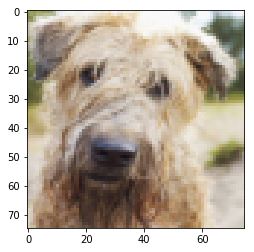

(75, 75, 3)


In [10]:
# test code: downsampling images
import scipy.misc
img = scipy.ndimage.imread('training_set/images/img_0001.jpg')
img2 = scipy.misc.imresize(img, [75, 75])
plt.imshow(img2)
plt.show()
print(img2.shape)

In [51]:
# read labels from file
import csv
with open('training_set/label_train.csv', newline='') as f:
    dataset = csv.reader(f, delimiter=',')
    dataset.__next__()
    zdset = list(zip(*dataset))

labels = zdset[1]
one_hots = np.zeros((len(labels), 3))

for k in range(len(labels)):
    one_hots[k, int(labels[k])] = 1

In [ ]:
# prepare the images

import numpy as np

def x_train_gen():
    for i in range(1, 3001):
        img = scipy.ndimage.imread('training_set/images/img_%04d.jpg' % i)
        yield scipy.misc.imresize(img, [75, 75])

        
all_data_set = []
for k, img in enumerate(x_train_gen()):
    all_data_set.append(img)

In [66]:
# preprocess the images into gray scale

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray


images = []
for x in all_data_set:
    if len(x.shape) == 3:
        y = rgb2gray(x)
    else:
        y = x
    y = np.expand_dims(y, 2)
    images.append(y)

print(len(images))
print(images[0].shape)

3000
(75, 75, 1)


In [71]:
# partition of training and validation dataset

N = 2900
training_x = images[:N]
training_y = one_hots[:N, :]

validation_x = images[N:]
validation_y = one_hots[N:, :]

In [ ]:
# training

batch_size = 20
epochs = 20
model.fit(np.array(training_x), np.array(training_y),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(validation_x), np.array(validation_y)))